## Hotel Reviews - Sentiment Analysis

In [36]:
## Import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import and Know the Dataset

In [33]:
## Load the dataset
df = pd.read_csv("/Users/yixuanli/repos/Exploratory-Data-Analysis/Sentiment-Analysis/Hotel-Reviews-Analysis/hotel_reviews.csv")
print("## The First 5 Rows ##", "\n")
df.head()

## The First 5 Rows ## 



,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...


In [34]:
%reload_ext autoreload
%autoreload 2
from data_management import data_report
data_report(df, verbose=True)

Found 2315 duplicated row(s). Removing them...
2315 duplicated row(s) removed.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4686 entries, 0 to 6991
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4686 non-null   object 
 1   Area               4686 non-null   object 
 2   Review_Date        4686 non-null   object 
 3   Rating_attribute   4686 non-null   object 
 4   Rating(Out of 10)  4686 non-null   float64
 5   Review_Text        4682 non-null   object 
dtypes: float64(1), object(5)
memory usage: 256.3+ KB
--------------------DATAFRAME INFO--------------------
##Raw Dataframe Info##
Row_num of the dataset: 7001
Col_num of the dataset: 6
Size of the dataset: 42006
##Dataframe Info##
##Null Data##
Name                 0
Area                 0
Review_Date          0
Rating_attribute     0
Rating(Out of 10)    0
Review_Text          4
##Number of Unique Values##
Name              

/Users/yixuanli/repos/Exploratory-Data-Analysis/Sentiment-Analysis/Hotel-Reviews-Analysis/data_management.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating(Out of 10)'].fillna(0, inplace=True)


### Exploratory Data Analysis

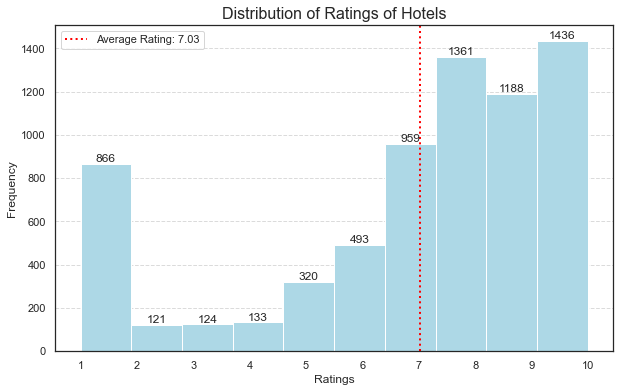

In [67]:
## Rating Analysis
sns.set(style = "white")

# Create a histogram
plt.figure(figsize = (10, 6))
n, bins, patches = plt.hist(df['Rating(Out of 10)'], bins = 10, color = 'lightblue')
average_rating = df['Rating(Out of 10)'].mean()

# Add labels and title
plt.xticks(range(int(min(bins)), int(max(bins)) + 1))
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings of Hotels', fontsize = 16)

# Annotate bars with data labels (values)
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    if y>0:
        plt.text(x, y, str(int(y)), ha='center', va='bottom')

plt.axvline(average_rating, color='red', linestyle='dotted', linewidth=2, label=f'Average Rating: {average_rating:.2f}')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()

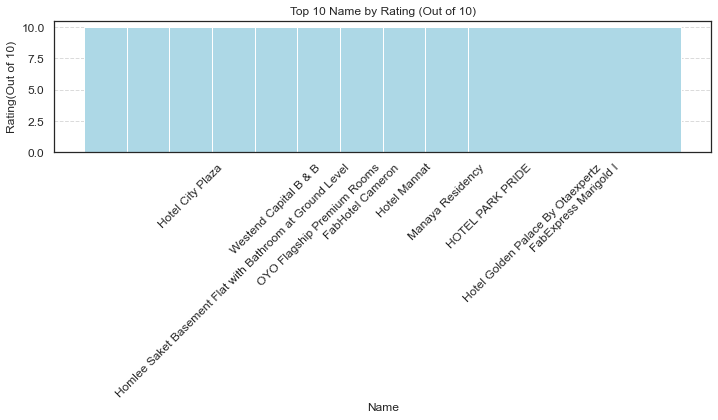

In [63]:
%reload_ext autoreload
%autoreload 2
from data_viz import bar_chart
bar_chart(df, "Name")